Loading MNIST dataset...
Original dataset shape: (70000, 784)
Running T-SNE...


d:\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


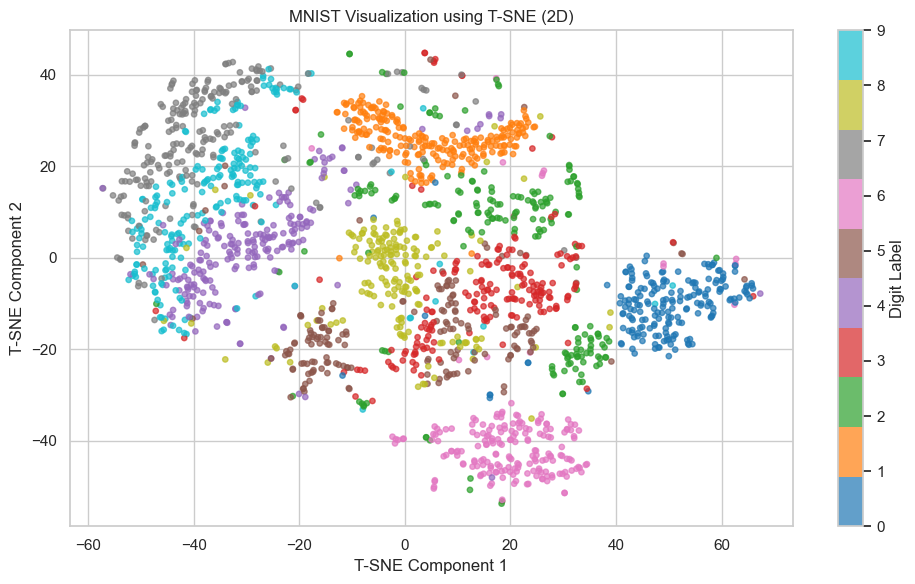

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Set seaborn style for better plots
sns.set(style='whitegrid')

# -----------------------------
# Step 1: Load MNIST dataset from openml
# -----------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Original dataset shape: {X.shape}")  # (70000, 784)

# -----------------------------
# Step 2: Reduce dataset size for T-SNE performance
# -----------------------------
# T-SNE is computationally heavy, so use only 2000 samples
SAMPLE_SIZE = 2000
X_small = X[:SAMPLE_SIZE]
y_small = y[:SAMPLE_SIZE]

# -----------------------------
# Step 3: Scale the data before applying T-SNE
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_small)

# -----------------------------
# Step 4: Apply T-SNE to reduce to 2 dimensions
# -----------------------------
print("Running T-SNE...")
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, init='pca', random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# -----------------------------
# Step 5: Plot the T-SNE results
# -----------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_small, cmap='tab10', alpha=0.7, s=15)
plt.colorbar(scatter, label='Digit Label')
plt.title("MNIST Visualization using T-SNE (2D)")
plt.xlabel("T-SNE Component 1")
plt.ylabel("T-SNE Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
